# Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models

Klara Krmpotić
0036519753


Unos svih potrebnih libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

Ucitavanje podataka i njihov ispis

In [10]:
dataset = pd.read_csv("oasis_cross-sectional.csv")

print(dataset)

                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_MR2   F    R   26   NaN  NaN   NaN  NaN  1283  0.834  1.368   

     Delay  
0      NaN  
1      NaN  
2      NaN  
3      NaN 

Popis stupaca i opis značajki koje imaju numeričke vrijednosti

In [11]:
print(dataset.columns.values)
print()
print(dataset.describe())
print()

['ID' 'M/F' 'Hand' 'Age' 'Educ' 'SES' 'MMSE' 'CDR' 'eTIV' 'nWBV' 'ASF'
 'Delay']

              Age        Educ         SES       MMSE         CDR         eTIV  \
count  436.000000  235.000000  216.000000  235.00000  235.000000   436.000000   
mean    51.357798    3.178723    2.490741   27.06383    0.285106  1481.919725   
std     25.269862    1.311510    1.120593    3.69687    0.383405   158.740866   
min     18.000000    1.000000    1.000000   14.00000    0.000000  1123.000000   
25%     23.000000    2.000000    2.000000   26.00000    0.000000  1367.750000   
50%     54.000000    3.000000    2.000000   29.00000    0.000000  1475.500000   
75%     74.000000    4.000000    3.000000   30.00000    0.500000  1579.250000   
max     96.000000    5.000000    5.000000   30.00000    2.000000  1992.000000   

             nWBV         ASF     Delay  
count  436.000000  436.000000  20.00000  
mean     0.791670    1.198894  20.55000  
std      0.059937    0.128682  23.86249  
min      0.644000   

Izbacivanje stupca Hand jer za sve primjere je izlaz R  
Izbacivanje stupca Delay jer samo njih 20 ima vrijednost za ostalih 416 vrijednsot nije poznata

In [12]:
dataset.drop(('Hand'), axis=1, inplace=True)
dataset.drop(('Delay'), axis=1, inplace=True)
print(dataset.isna().sum())
print()

ID        0
M/F       0
Age       0
Educ    201
SES     220
MMSE    201
CDR     201
eTIV      0
nWBV      0
ASF       0
dtype: int64



### Nedostajući podatci   
Ubaci srednju vrijednost godina tamo gdje nedostaje ta informacija  
Ne izmacivati zapise i znacajke jer su potrebne aa ak se izbace one koje nemaju, maknulo bi se 50 posto podataka  
Uglavnom isti zapis nema sve cetiri vrijednosti tako da bi stvarno otislo skoro 50 posto podataka

In [13]:
dataset_tmp = dataset.copy()

dataset_tmp.loc[dataset_tmp.Educ.isna(),'Educ'] = dataset_tmp.loc[:,'Educ'].mean()
dataset_tmp.loc[dataset_tmp.SES.isna(),'SES'] = dataset_tmp.loc[:,'SES'].mean()
dataset_tmp.loc[dataset_tmp.MMSE.isna(),'MMSE'] = dataset_tmp.loc[:,'MMSE'].mean()
dataset_tmp.loc[dataset_tmp.CDR.isna(),'CDR'] = dataset_tmp.loc[:,'CDR'].mean()
print(dataset_tmp)

                ID M/F  Age      Educ       SES      MMSE       CDR  eTIV  \
0    OAS1_0001_MR1   F   74  2.000000  3.000000  29.00000  0.000000  1344   
1    OAS1_0002_MR1   F   55  4.000000  1.000000  29.00000  0.000000  1147   
2    OAS1_0003_MR1   F   73  4.000000  3.000000  27.00000  0.500000  1454   
3    OAS1_0004_MR1   M   28  3.178723  2.490741  27.06383  0.285106  1588   
4    OAS1_0005_MR1   M   18  3.178723  2.490741  27.06383  0.285106  1737   
..             ...  ..  ...       ...       ...       ...       ...   ...   
431  OAS1_0285_MR2   M   20  3.178723  2.490741  27.06383  0.285106  1469   
432  OAS1_0353_MR2   M   22  3.178723  2.490741  27.06383  0.285106  1684   
433  OAS1_0368_MR2   M   22  3.178723  2.490741  27.06383  0.285106  1580   
434  OAS1_0379_MR2   F   20  3.178723  2.490741  27.06383  0.285106  1262   
435  OAS1_0395_MR2   F   26  3.178723  2.490741  27.06383  0.285106  1283   

      nWBV    ASF  
0    0.743  1.306  
1    0.810  1.531  
2    0.708  1.2

### Stršeće vrijednosti  

Alzheimer je bolest od koje oboljevaju stariji, mlađi su "exceptions" - prosjek godina je 51.35 i stdev je +/- 25.27. Sto znaći da je donja granica 26.08 a isto tako 25% po Gaussovoj razdiobi daje vrijednost od 23 godina. Što povlaći da se primjeri koji su mlađi od toga mogu odbaciti, isto tako iz inicijalne tablice se vidi da podaci za primjere gdje je osoba mlađa od 23 godine, nema podatke za polja Educ, SES, MMSE, CDR tako da su njihove vrijednosti popunjene s prosjekom, što znači da ne će utjecati na promjenu

In [14]:
# print(dataset_tmp.loc[dataset_tmp[(dataset_tmp.Age < 23) & (dataset_tmp.nWBV < 0.842)].index])
dataset_tmp.drop(dataset_tmp[(dataset_tmp.Age < 23) & (dataset_tmp.nWBV < 0.809)].index, inplace=True)
dataset_tmp.drop(dataset_tmp[(dataset_tmp.Age < 23)].index, inplace=True)
## dataset_tmp.drop(dataset_tmp.loc[dataset_tmp.Age < 23, :], axis=0, inplace=True)
print(dataset_tmp.sort_values(by='ID'))


                ID M/F  Age      Educ       SES      MMSE       CDR  eTIV  \
0    OAS1_0001_MR1   F   74  2.000000  3.000000  29.00000  0.000000  1344   
1    OAS1_0002_MR1   F   55  4.000000  1.000000  29.00000  0.000000  1147   
2    OAS1_0003_MR1   F   73  4.000000  3.000000  27.00000  0.500000  1454   
3    OAS1_0004_MR1   M   28  3.178723  2.490741  27.06383  0.285106  1588   
5    OAS1_0006_MR1   F   24  3.178723  2.490741  27.06383  0.285106  1131   
..             ...  ..  ...       ...       ...       ...       ...   ...   
411  OAS1_0453_MR1   F   70  1.000000  4.000000  29.00000  0.500000  1295   
412  OAS1_0454_MR1   F   73  3.000000  2.000000  23.00000  0.500000  1536   
413  OAS1_0455_MR1   F   61  2.000000  4.000000  28.00000  0.000000  1354   
414  OAS1_0456_MR1   M   61  5.000000  2.000000  30.00000  0.000000  1637   
415  OAS1_0457_MR1   F   62  3.000000  3.000000  26.00000  0.000000  1372   

      nWBV    ASF  
0    0.743  1.306  
1    0.810  1.531  
2    0.708  1.2

### Vizualizacija podataka

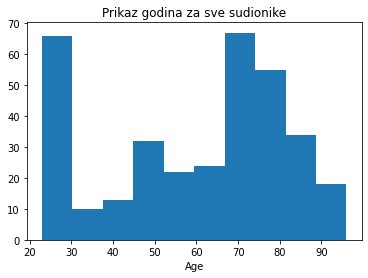

In [15]:
plt.hist(dataset_tmp.Age)
plt.title('Prikaz godina za sve sudionike')
plt.xlabel('Age')
plt.show()
# print(dataset_tmp.sort_values(by='ID'))

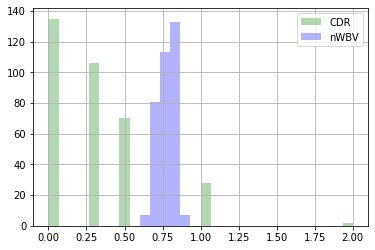

In [16]:
plt.hist(dataset_tmp.CDR, bins=30, range=(0,2), label='CDR', color='green', alpha=0.3)
plt.hist(dataset_tmp.nWBV, bins=30, range=(0,2), label='nWBV', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

3.178723    106
2.000000     64
5.000000     51
4.000000     50
3.000000     47
1.000000     23
Name: Educ, dtype: int64


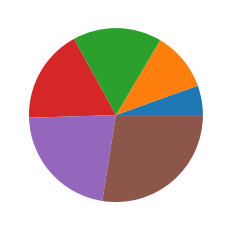

In [39]:
title_name = dataset_tmp.groupby('Educ').count().index.values
percent = (title_name/len(dataset_tmp))*100

print(pd.Series(dataset_tmp['Educ']).value_counts())
plt.pie(percent)
plt.show()